## Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
customers = pd.read_csv(r"C:\Users\mrunmai k\OneDrive\Desktop\DataScienceInternAssign\files\Customers.csv")
products = pd.read_csv(r"C:\Users\mrunmai k\OneDrive\Desktop\DataScienceInternAssign\files\Products.csv")
transactions = pd.read_csv(r"C:\Users\mrunmai k\OneDrive\Desktop\DataScienceInternAssign\files\Transactions.csv")


In [4]:
print("Customer information:")
print(customers.info())
print("Products information:")
print(products.info())
print("Transaction information:")
print(transactions.info())

Customer information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Transaction information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  

In [5]:
customers.shape
products.shape
transactions.shape

(1000, 7)

In [6]:
customers.describe()
products.describe()
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [7]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [8]:
# Merge datasets
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")
merged_data = pd.merge(merged_data, products, on="ProductID", how="left")

In [9]:
# Convert dates to datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [10]:
print("\\nBasic Statistics:")
print(merged_data.describe())

\nBasic Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  


In [11]:
# Revenue Analysis
total_revenue = merged_data['TotalValue'].sum()
print(f"\nTotal Revenue: ${total_revenue:.2f}")


Total Revenue: $689995.56


In [12]:
# Revenue by Region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:\n", revenue_by_region)


Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [13]:
# Top-Selling Products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop-Selling Products:\n", top_products)


Top-Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [14]:
# Revenue Trends over Time
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('MonthYear')['TotalValue'].sum()

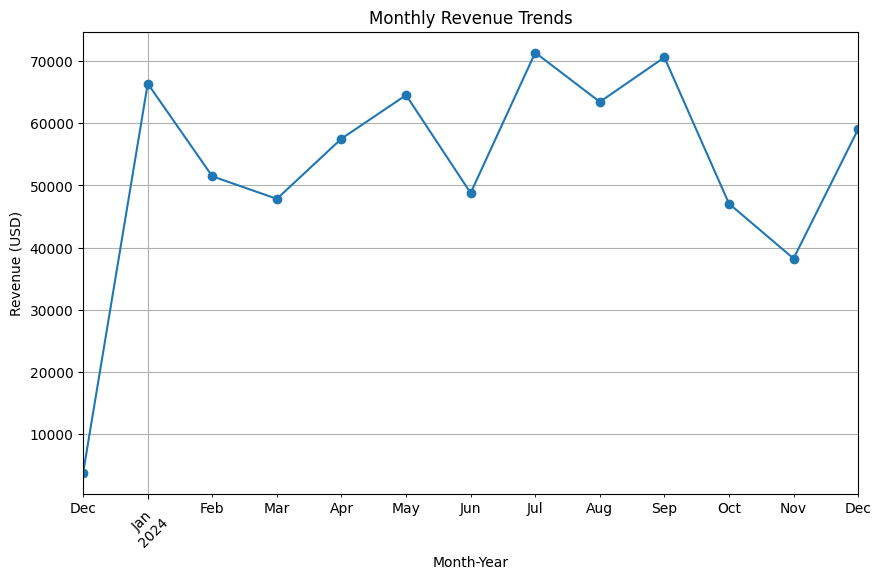

In [15]:
# Visualize Monthly Revenue Trends
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month-Year')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:\n", category_revenue)


Revenue by Product Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [17]:
# Top Customers by Revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop Customers by Revenue:\n", top_customers)


Top Customers by Revenue:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


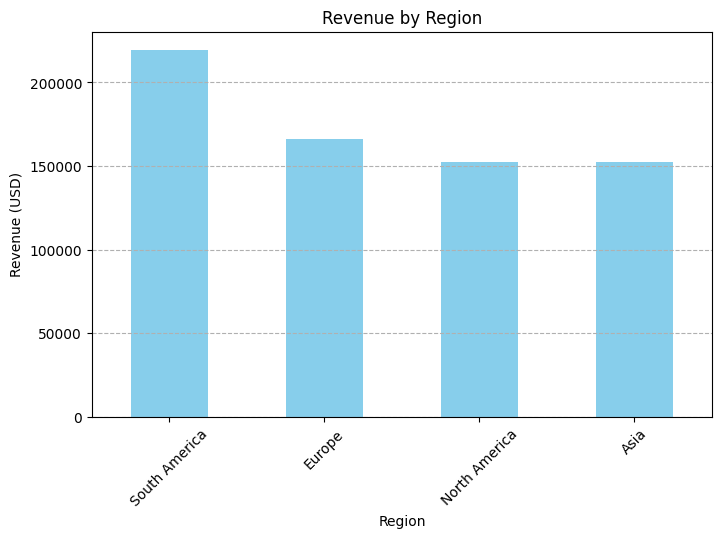

In [21]:
# Visualize Revenue by Region
plt.figure(figsize=(8, 5))
revenue_by_region.plot(kind='bar', color='skyblue')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()